# Optical Elements as Ophyd Objects

This section is based on the **TES** beamline example.

**Hint**: See the [List of predefined simulations in Sirepo](../simulations.rst) for examples of identifiers for different beamlines.

## Run "Beamline" SRW simulations

In this example, we scan the horizontal size of the aperture and collect the resulting averaged intensities and corresponding 2D intensity distributions from the "Watchpoint" report on the "Beamline" page of Sirepo/SRW app.

Start ``ipython`` and run the following where ``sim_id`` is the UID for the simulation we are working with:



Transient Scan ID: 1     Time: 2022-01-12 22:02:14
Persistent Unique Scan ID: 'a48f0135-afd0-477e-848c-b58bee4150de'


New stream: 'primary'
+-----------+------------+-------------------------+------------+
|   seq_num |       time | aperture_horizontalSize |    w9_mean |
+-----------+------------+-------------------------+------------+
|         1 | 22:02:48.2 |                   0.000 |      0.000 |


|         2 | 22:03:17.8 |                   0.500 | 2510544190625.287 |


|         3 | 22:03:47.5 |                   1.000 | 41560782559219.422 |


|         4 | 22:04:17.3 |                   1.500 | 136793792948293.203 |


|         5 | 22:04:46.9 |                   2.000 | 346875726031568.125 |
+-----------+------------+-------------------------+------------+
generator scan ['a48f0135'] (scan num: 1)





                                 time  aperture_horizontalSize  \
seq_num                                                          
1       2022-01-12 22:02:48.235076189                      0.0   
2       2022-01-12 22:03:17.850667715                      0.5   
3       2022-01-12 22:03:47.531887293                      1.0   
4       2022-01-12 22:04:17.322095156                      1.5   
5       2022-01-12 22:04:46.968159199                      2.0   

                                       w9_sirepo_data_json  \
seq_num                                                      
1        {"models": {"arbitraryMagField": {"interpolati...   
2        {"models": {"arbitraryMagField": {"interpolati...   
3        {"models": {"arbitraryMagField": {"interpolati...   
4        {"models": {"arbitraryMagField": {"interpolati...   
5        {"models": {"arbitraryMagField": {"interpolati...   

                                       w9_sirepo_data_hash  w9_duration  \
seq_num                    

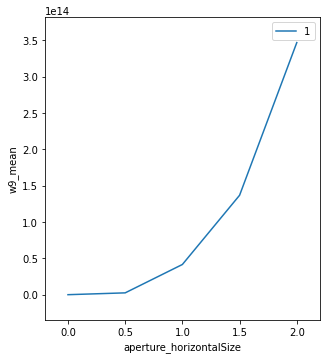

In [1]:
%run -i ../../../examples/prepare_det_env.py

from sirepo_bluesky.sirepo_bluesky import SirepoBluesky
from sirepo_bluesky.sirepo_ophyd import create_classes

connection = SirepoBluesky("http://localhost:8000")

data, schema = connection.auth("srw", "00000002")
classes, objects = create_classes(connection.data,
                                  connection=connection)
globals().update(**objects)

aperture.horizontalSize.kind = "hinted"

(uid,) = RE(bp.scan([w9], aperture.horizontalSize, 0, 2, 5))

hdr = db[uid]
tbl = hdr.table(fill=True)
print(tbl)

w9_image = np.array(list(hdr.data("w9_image")))

Data shape: (5, 42, 960)


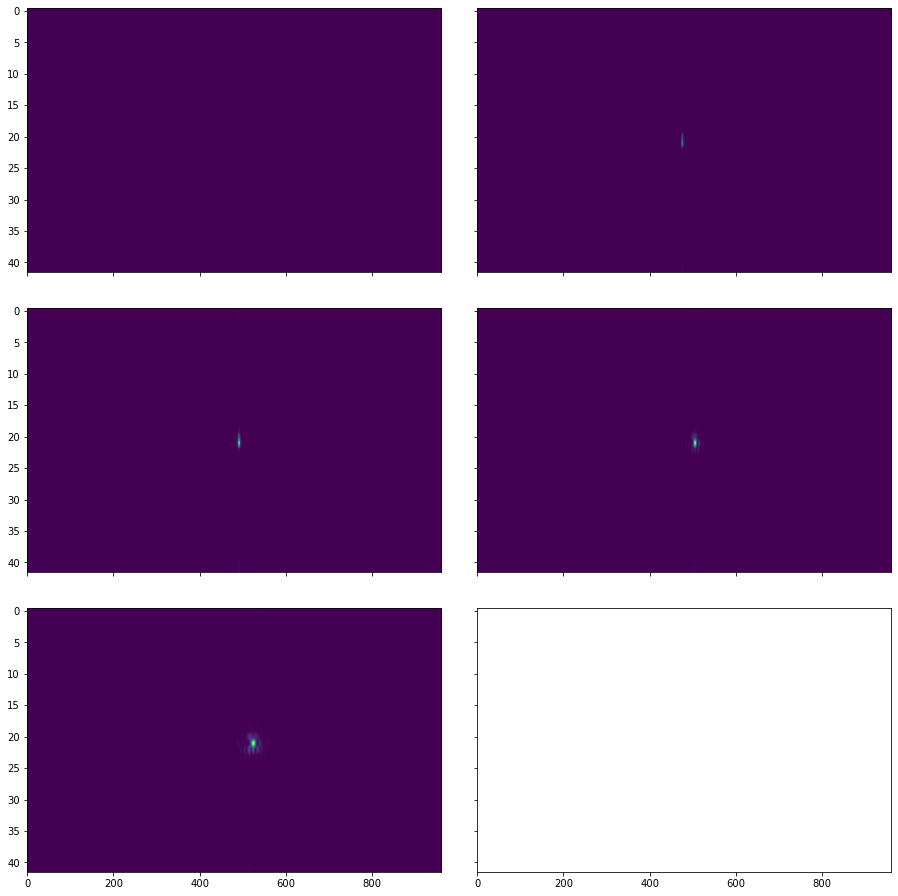

In [2]:
from mpl_toolkits.axes_grid1 import ImageGrid

print(f"Data shape: {w9_image.shape}")
num_frames = w9_image.shape[0]
ncols = 2
nrows = int(np.ceil(num_frames / ncols))

fig = plt.figure()
grid = ImageGrid(fig, (1, 2, ncols, nrows),
                 nrows_ncols=(nrows, ncols),
                 axes_pad=0.5,
                 aspect=False)

for ax, im in zip(grid, w9_image[:, ...]):
    ax.imshow(im, aspect="auto")

## Run "Beam Statistics" Sirepo/Shadow app simulations

In this example, we scan the toroidal mirror's radius and collect the results of the "Beam Statistics" report on the "Beamline" page of Sirepo/Shadow app. At the end of the execution, we provide the timing report for these simulations.

In [3]:
%run -i ../../../examples/prepare_det_env.py

from sirepo_bluesky.sirepo_bluesky import SirepoBluesky
from sirepo_bluesky.sirepo_ophyd import BeamStatisticsReport, create_classes

connection = SirepoBluesky("http://localhost:8000")

data, schema = connection.auth("shadow", "00000002")

classes, objects = create_classes(connection.data,
                                  connection=connection)
globals().update(**objects)

bsr = BeamStatisticsReport(name="bsr", connection=connection)

toroid.r_maj.kind = "hinted"

scan_range = (10_000, 50_000, 21)

(uid,) = RE(bp.scan([bsr], toroid.r_maj, *scan_range))

hdr = db[uid]
tbl = hdr.table()
print(tbl)



Transient Scan ID: 1     Time: 2022-01-12 22:04:48
Persistent Unique Scan ID: '6453c436-a422-4540-9134-b6d0f64a62ef'


New stream: 'primary'
+-----------+------------+--------------+
|   seq_num |       time | toroid_r_maj |
+-----------+------------+--------------+
|         1 | 22:04:54.9 |    10000.000 |


|         2 | 22:04:59.0 |    12000.000 |


|         3 | 22:05:03.2 |    14000.000 |


|         4 | 22:05:07.4 |    16000.000 |


|         5 | 22:05:11.5 |    18000.000 |


|         6 | 22:05:15.7 |    20000.000 |


|         7 | 22:05:19.9 |    22000.000 |


|         8 | 22:05:24.0 |    24000.000 |


|         9 | 22:05:28.2 |    26000.000 |


|        10 | 22:05:32.3 |    28000.000 |


|        11 | 22:05:36.5 |    30000.000 |


|        12 | 22:05:40.7 |    32000.000 |


|        13 | 22:05:44.8 |    34000.000 |


|        14 | 22:05:49.0 |    36000.000 |


|        15 | 22:05:53.2 |    38000.000 |


|        16 | 22:05:57.3 |    40000.000 |


|        17 | 22:06:01.5 |    42000.000 |


|        18 | 22:06:05.6 |    44000.000 |


|        19 | 22:06:09.8 |    46000.000 |


|        20 | 22:06:13.9 |    48000.000 |


|        21 | 22:06:18.1 |    50000.000 |
+-----------+------------+--------------+
generator scan ['6453c436'] (scan num: 1)





                                 time  toroid_r_maj  \
seq_num                                               
1       2022-01-12 22:04:54.938966274       10000.0   
2       2022-01-12 22:04:59.097331285       12000.0   
3       2022-01-12 22:05:03.259565830       14000.0   
4       2022-01-12 22:05:07.415700674       16000.0   
5       2022-01-12 22:05:11.575418949       18000.0   
6       2022-01-12 22:05:15.741011858       20000.0   
7       2022-01-12 22:05:19.900308847       22000.0   
8       2022-01-12 22:05:24.047226191       24000.0   
9       2022-01-12 22:05:28.204518318       26000.0   
10      2022-01-12 22:05:32.357930183       28000.0   
11      2022-01-12 22:05:36.562797308       30000.0   
12      2022-01-12 22:05:40.740282059       32000.0   
13      2022-01-12 22:05:44.896337986       34000.0   
14      2022-01-12 22:05:49.046755552       36000.0   
15      2022-01-12 22:05:53.215933323       38000.0   
16      2022-01-12 22:05:57.375439405       40000.0   
17      20

/tmp/ipykernel_6489/1375322784.py:6: RuntimeWarning: More than 20 figures have been opened. Figures created through the pyplot interface (`matplotlib.pyplot.figure`) are retained until explicitly closed and may consume too much memory. (To control this warning, see the rcParam `figure.max_open_warning`).
  plt.figure(figsize=(16, 4))


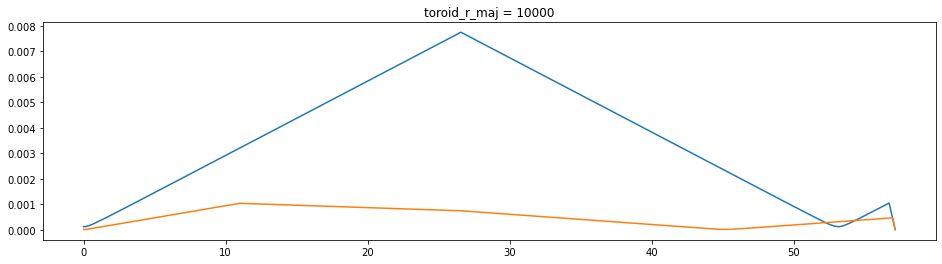

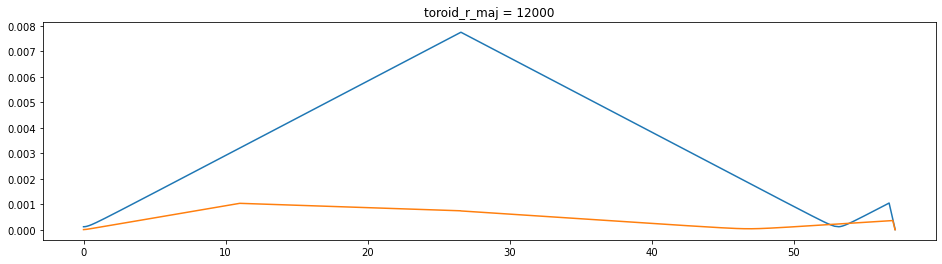

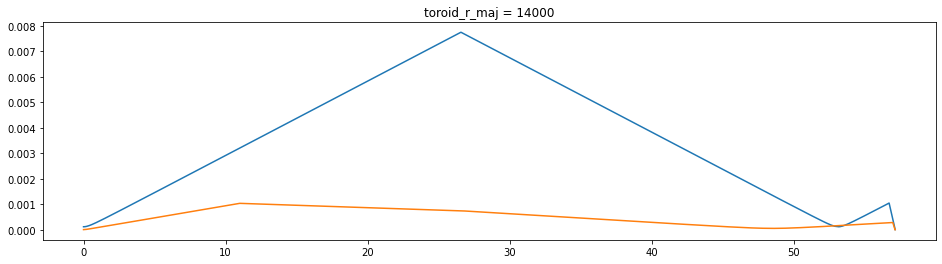

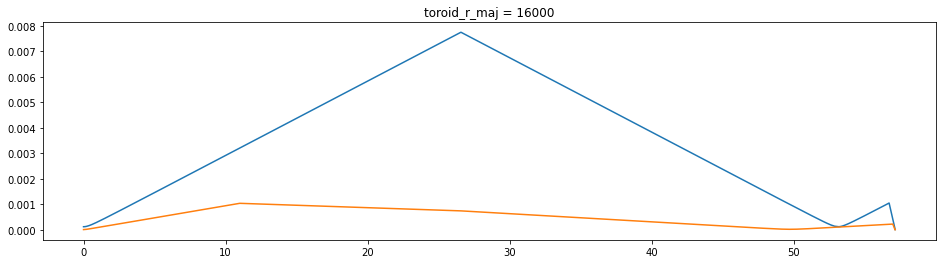

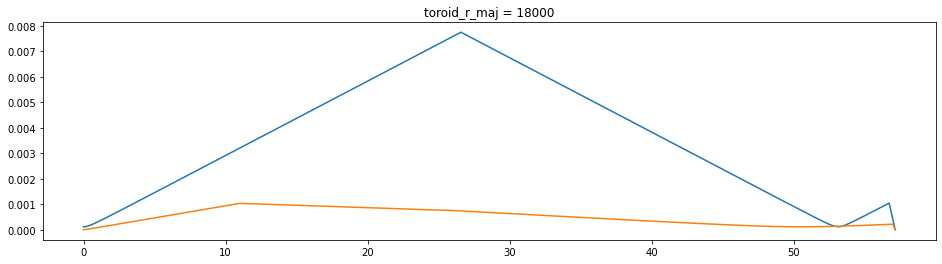

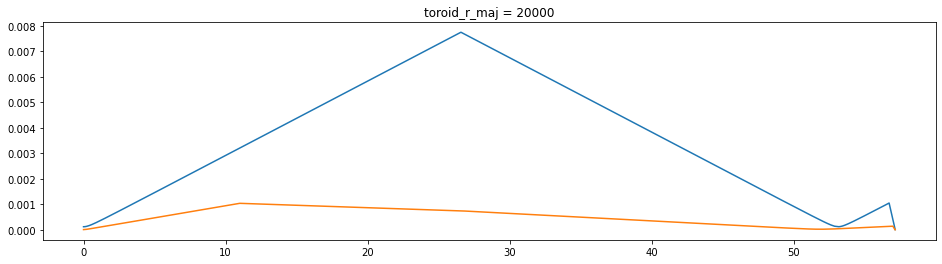

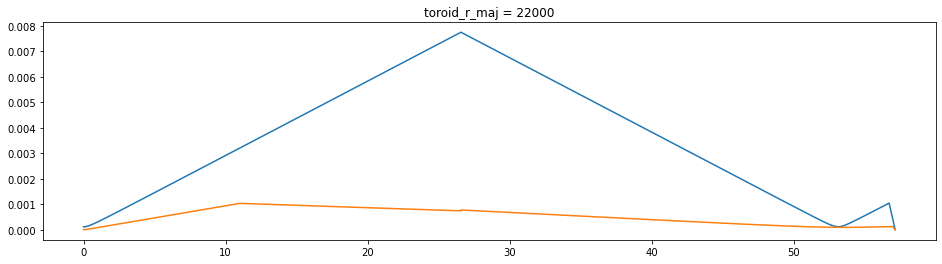

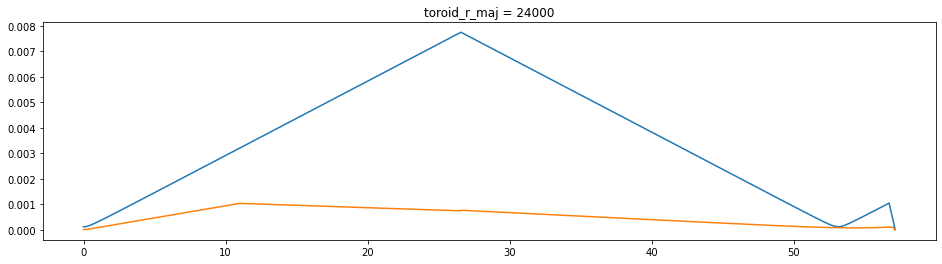

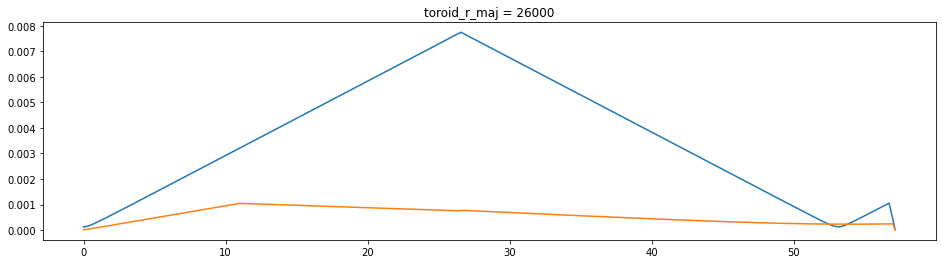

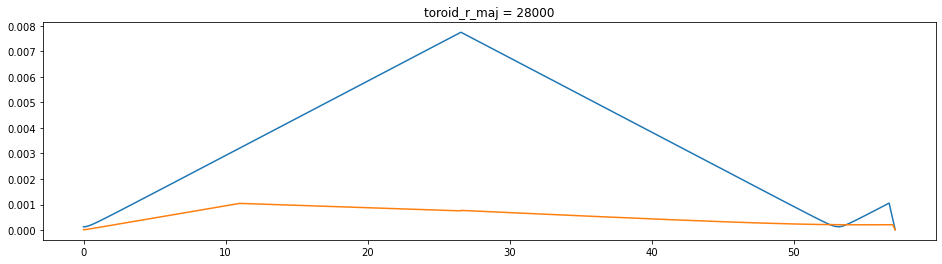

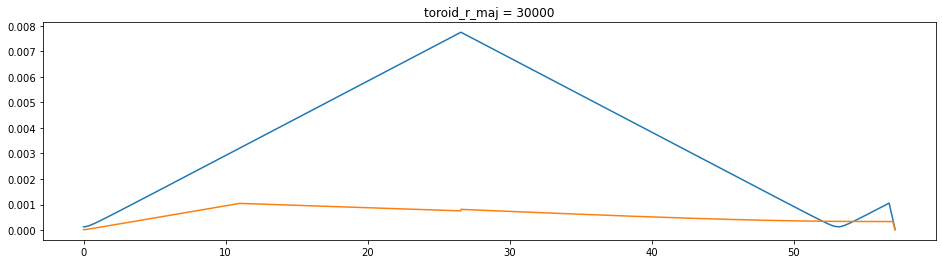

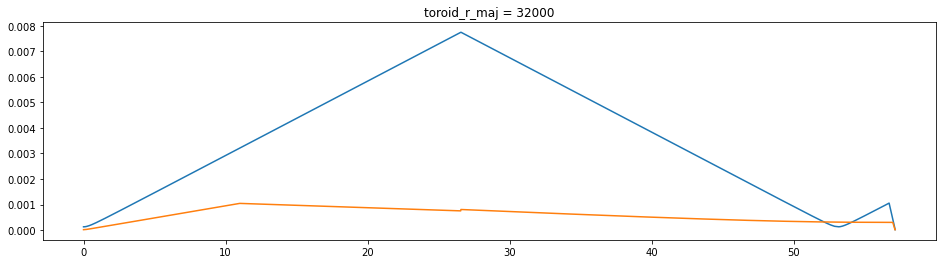

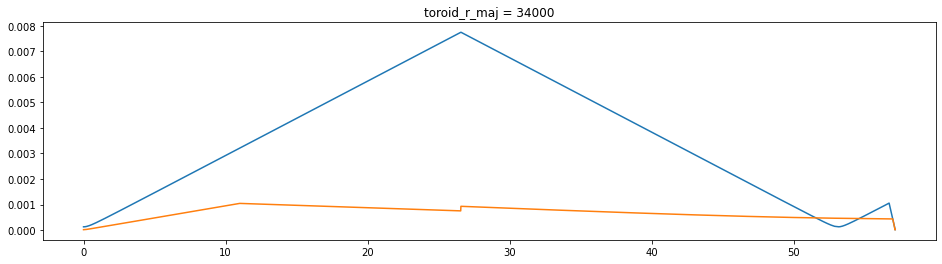

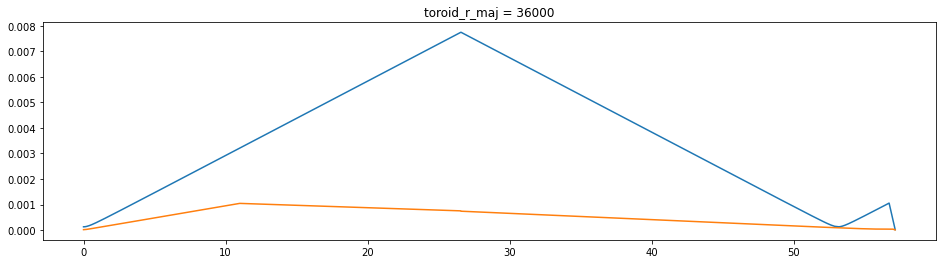

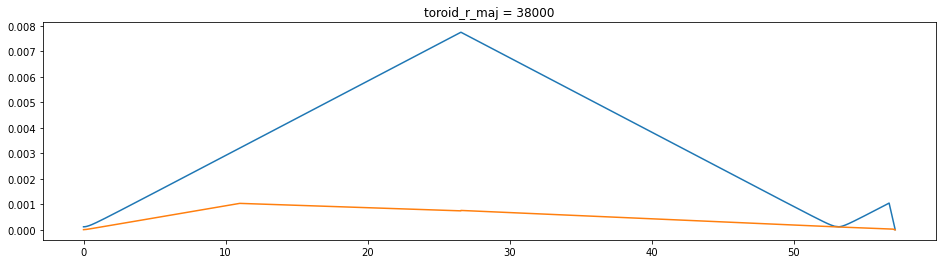

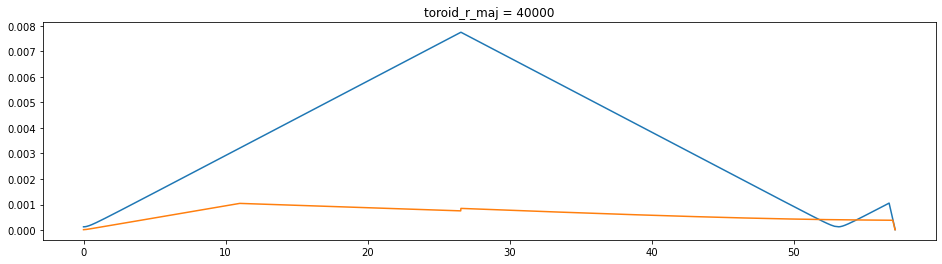

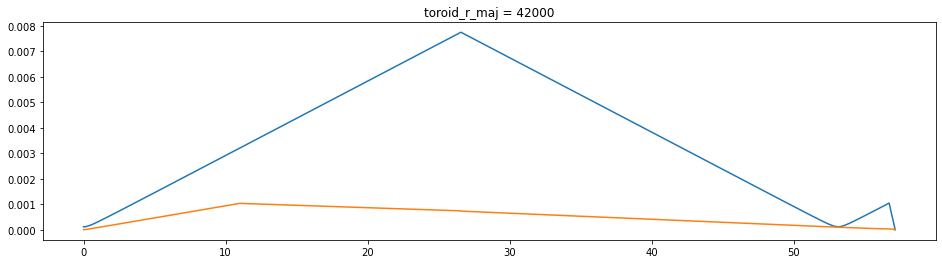

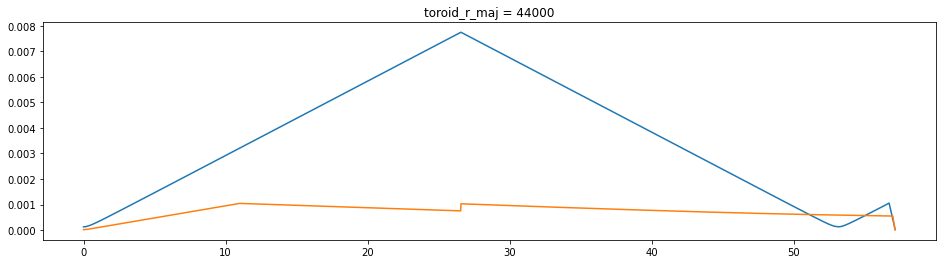

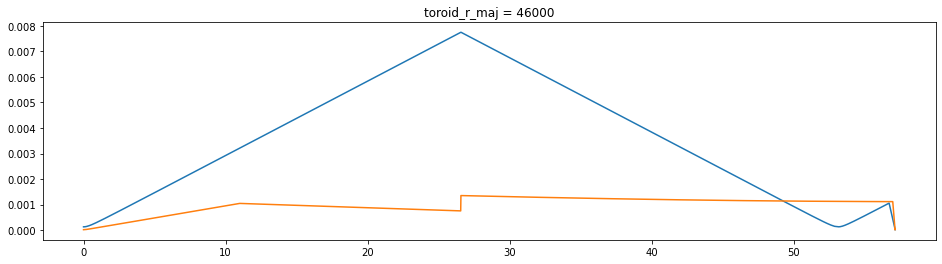

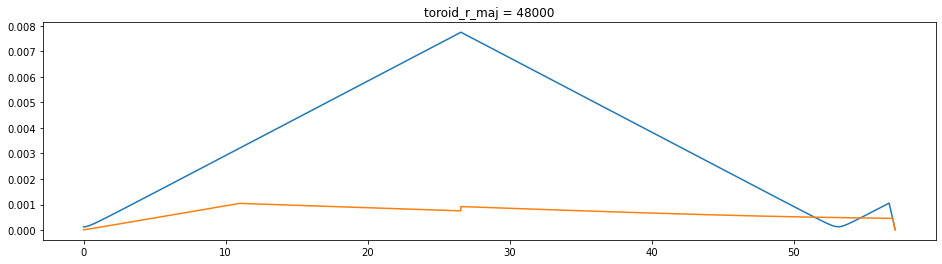

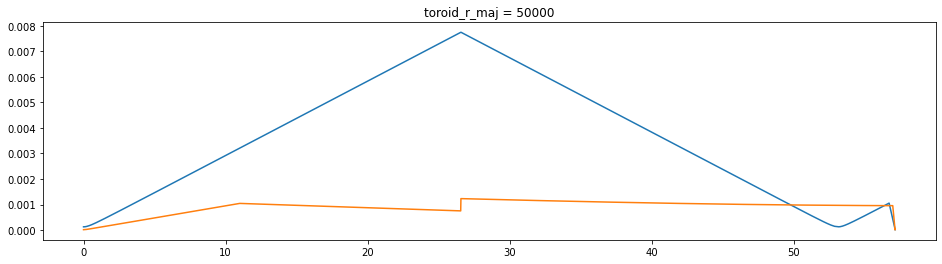

In [4]:
import json
import matplotlib.pyplot as plt

for idx in range(1, tbl["toroid_r_maj"].size + 1):
    d = json.loads(tbl["bsr_report"][idx])
    plt.figure(figsize=(16, 4))
    plt.plot(d["s"], d["sigmax"])
    plt.plot(d["s"], d["sigmaz"])
    plt.title(f"toroid_r_maj = {tbl['toroid_r_maj'][idx]:.0f}")

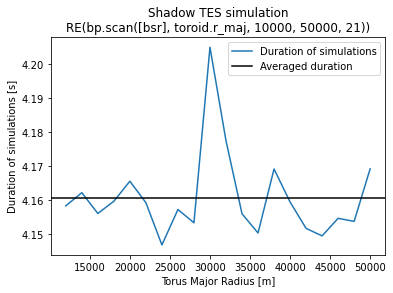

In [5]:
data = np.array(tbl["time"].diff(), dtype=float)[1:] / 1e9

fig = plt.figure()
ax = fig.add_subplot()
ax.plot(np.linspace(*scan_range)[1:], data, label="Duration of simulations")
ax.set_ylabel("Duration of simulations [s]")
ax.set_xlabel("Torus Major Radius [m]")
ax.axhline(data.mean(), color="k", label="Averaged duration")
ax.legend()
title = (
    f"Shadow TES simulation\n"
    f"RE(bp.scan([bsr], toroid.r_maj, "
    f"{', '.join([str(x) for x in scan_range])}))"
)
ax.set_title(title)
plt.show()